<a href="https://colab.research.google.com/github/dhk/adventures-in-ai/blob/main/greatest-democracy/democracy_fairness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

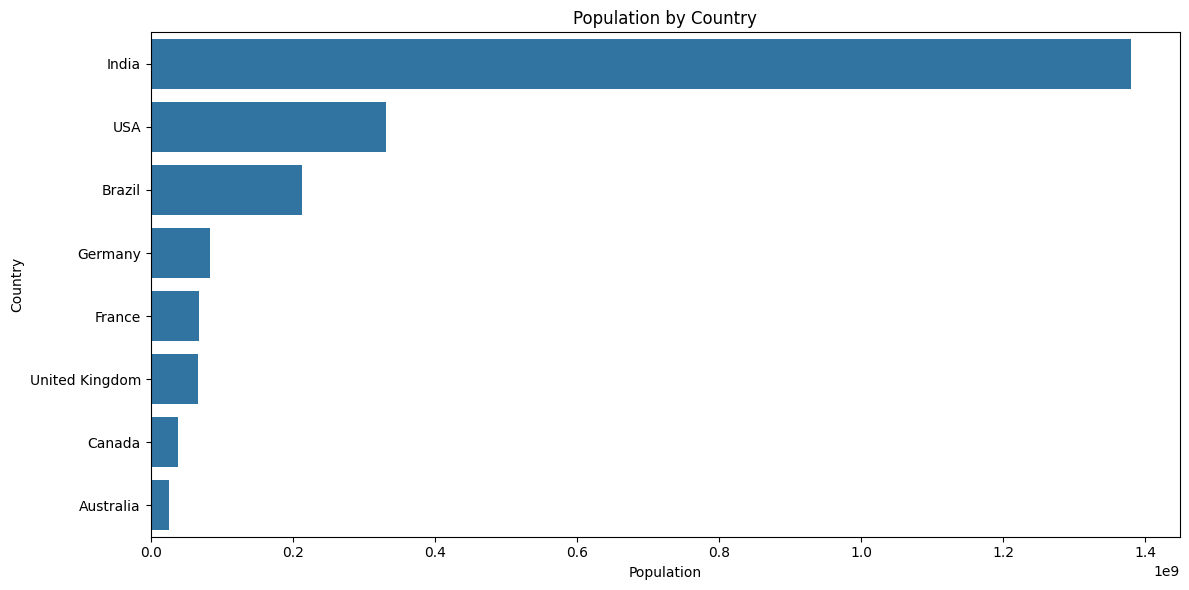

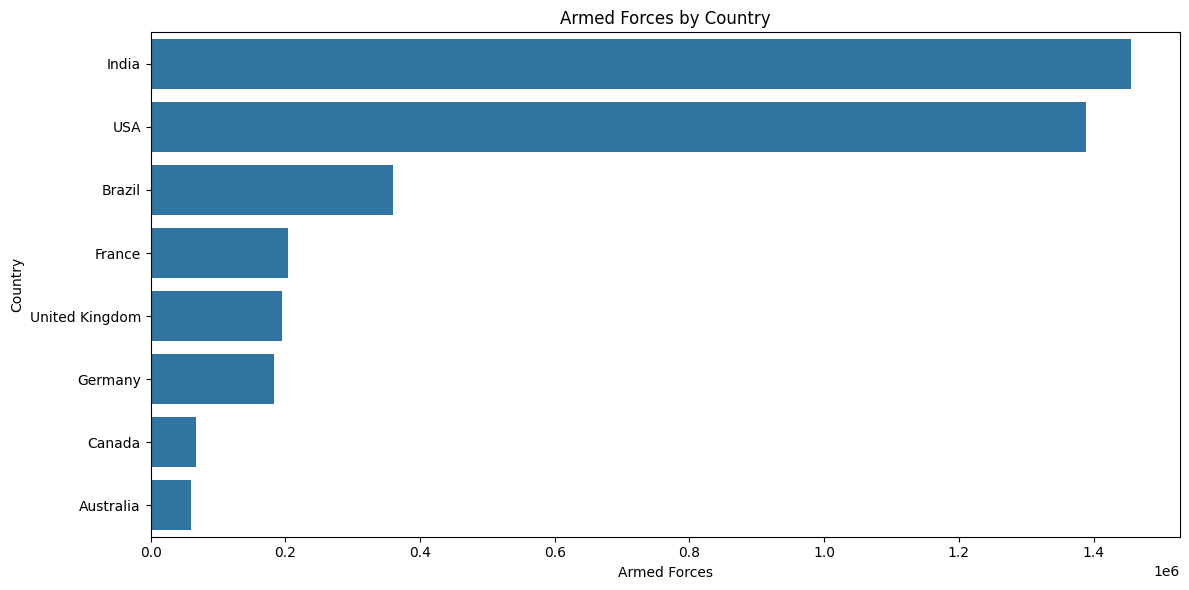

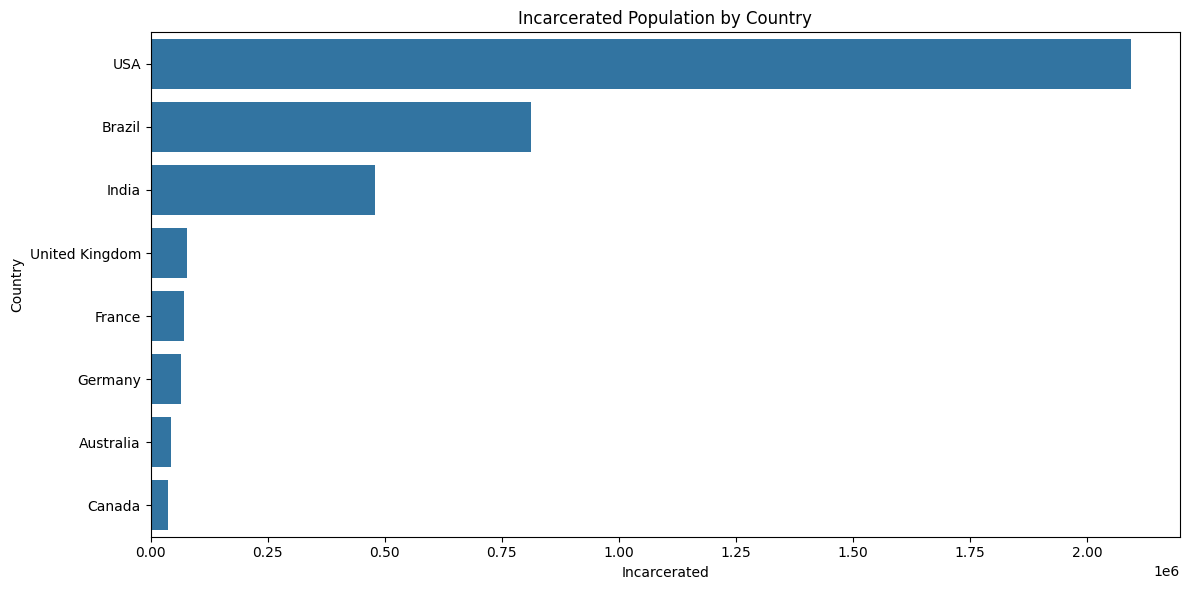

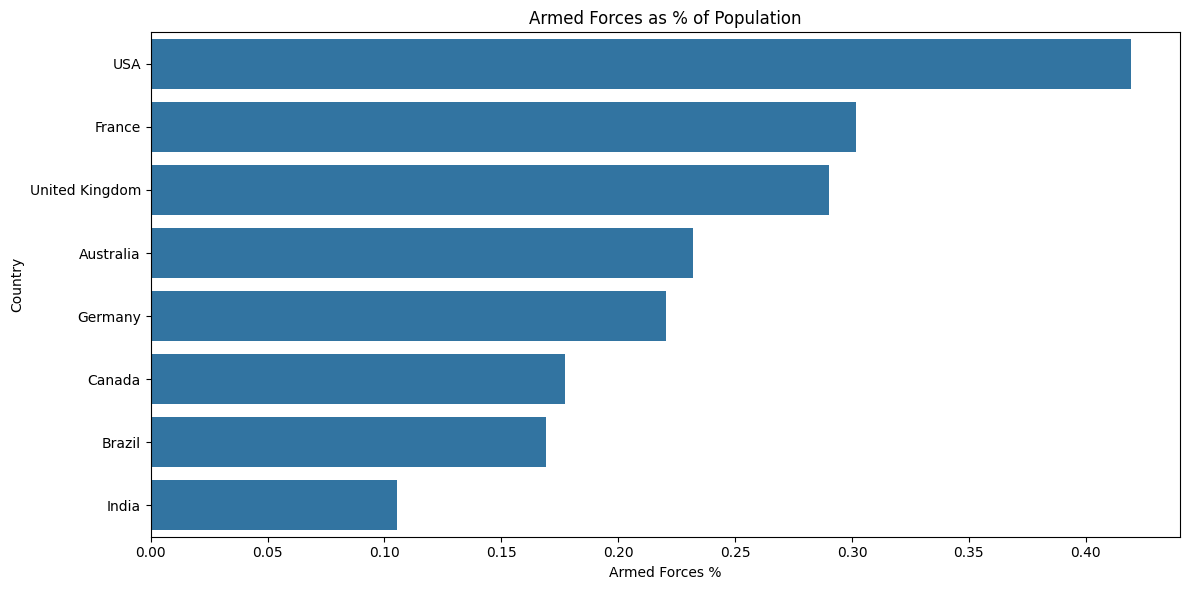

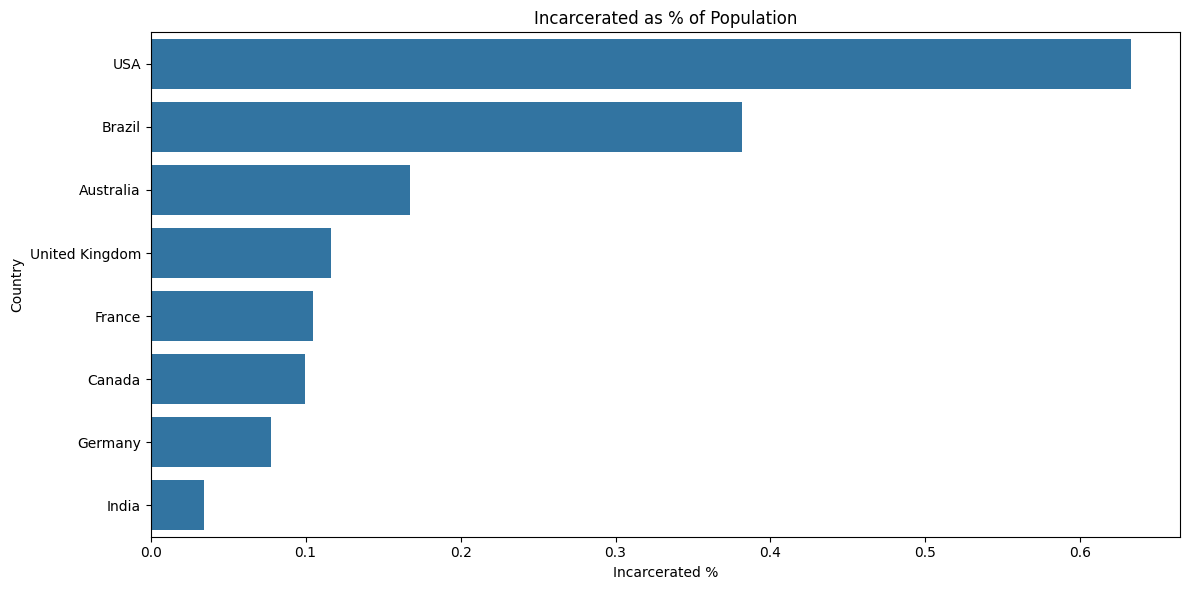

       Country  Population  Armed Forces  Incarcerated  Armed Forces %  Incarcerated %
United Kingdom    67220000        194970         78058        0.290048        0.116123
       Germany    83240000        183638         64666        0.220613        0.077686
        Canada    38010000         67400         37854        0.177322        0.099590
     Australia    25690000         59600         42970        0.231997        0.167264
         India  1380000000       1455550        478600        0.105475        0.034681
        Brazil   212600000        360000        811707        0.169332        0.381800
        France    67390000        203250         70651        0.301603        0.104839
           USA   331000000       1388100       2094000        0.419366        0.632628


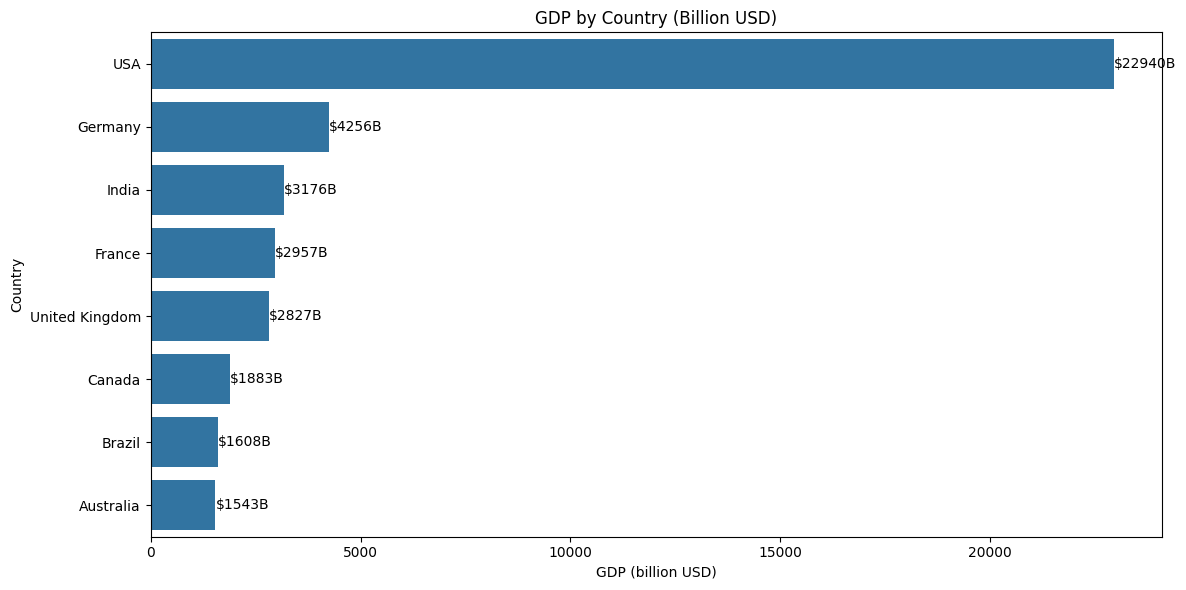

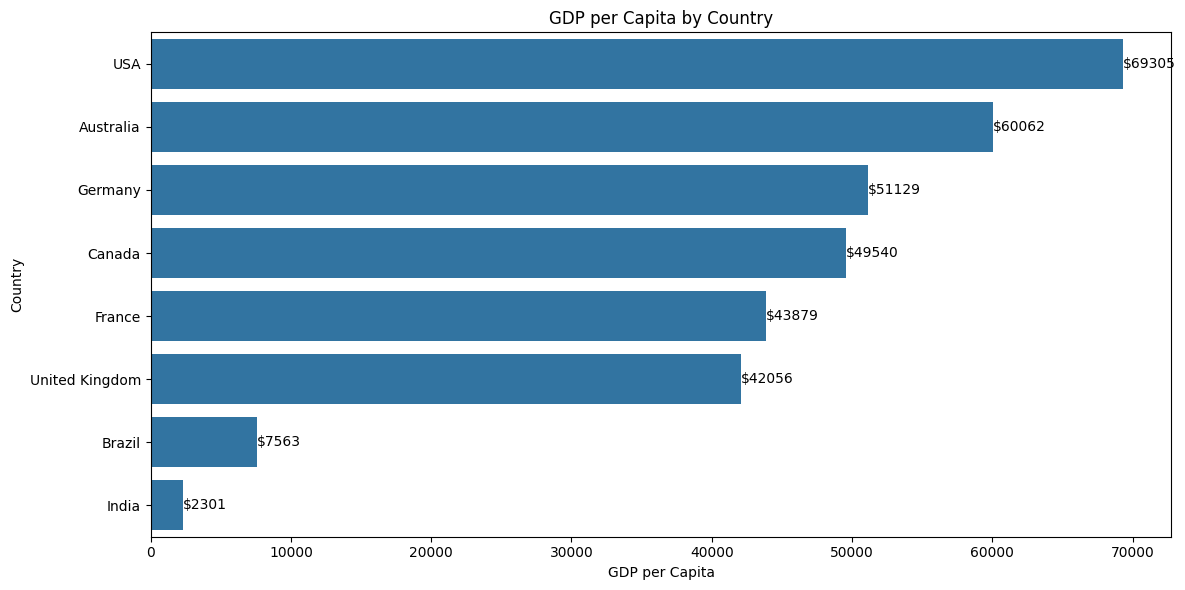

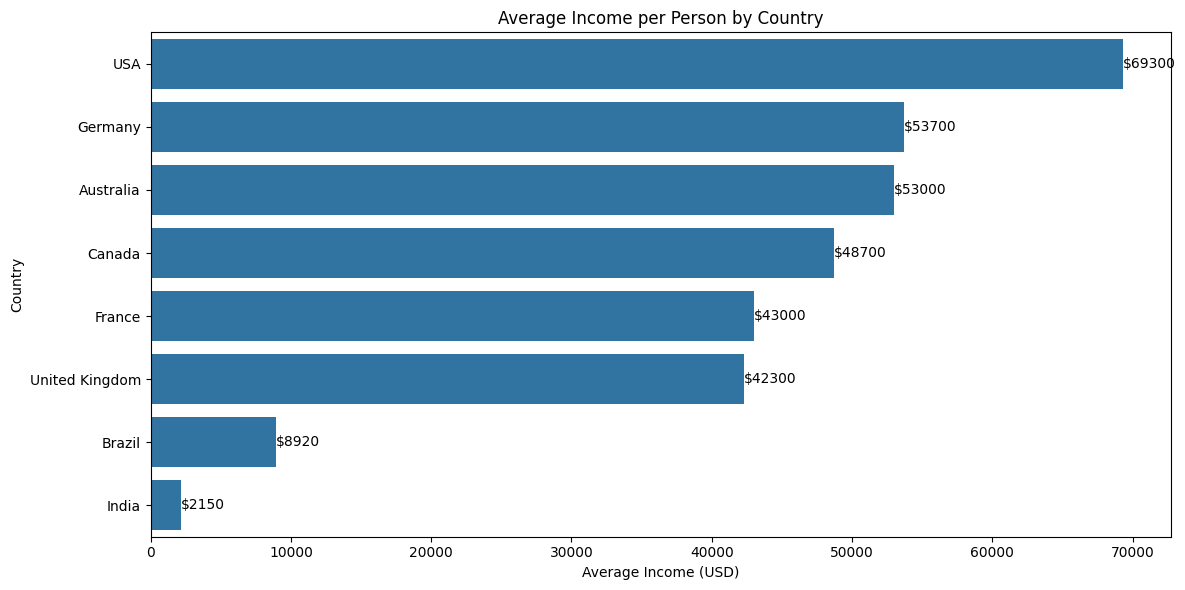

       Country  Population  Armed Forces  Incarcerated  Armed Forces %  Incarcerated %  GDP (billion USD)  Average Income (USD)  GDP per Capita
United Kingdom    67220000        194970         78058        0.290048        0.116123               2827                 42300    42055.935733
       Germany    83240000        183638         64666        0.220613        0.077686               4256                 53700    51129.264777
        Canada    38010000         67400         37854        0.177322        0.099590               1883                 48700    49539.594843
     Australia    25690000         59600         42970        0.231997        0.167264               1543                 53000    60062.281043
         India  1380000000       1455550        478600        0.105475        0.034681               3176                  2150     2301.449275
        Brazil   212600000        360000        811707        0.169332        0.381800               1608                  8920     7563

In [11]:
#Democracy Metrics Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary with the data
data = {
    'Country': ['United Kingdom', 'Germany', 'Canada', 'Australia', 'India', 'Brazil', 'France', 'USA'],
    'Population': [67220000, 83240000, 38010000, 25690000, 1380000000, 212600000, 67390000, 331000000],
    'Armed Forces': [194970, 183638, 67400, 59600, 1455550, 360000, 203250, 1388100],
    'Incarcerated': [78058, 64666, 37854, 42970, 478600, 811707, 70651, 2094000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate percentages
df['Armed Forces %'] = df['Armed Forces'] / df['Population'] * 100
df['Incarcerated %'] = df['Incarcerated'] / df['Population'] * 100

# Function to create and save a bar plot
def create_bar_plot(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=column, y='Country', data=df.sort_values(column, ascending=False))
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Create visualizations
create_bar_plot(df, 'Population', 'Population by Country')
create_bar_plot(df, 'Armed Forces', 'Armed Forces by Country')
create_bar_plot(df, 'Incarcerated', 'Incarcerated Population by Country')
create_bar_plot(df, 'Armed Forces %', 'Armed Forces as % of Population')
create_bar_plot(df, 'Incarcerated %', 'Incarcerated as % of Population')
# Print the DataFrame
print(df.to_string(index=False))

# Add new data for GDP and Average Income
gdp_data = {
    'Country': ['United Kingdom', 'Germany', 'Canada', 'Australia', 'India', 'Brazil', 'France', 'USA'],
    'GDP (billion USD)': [2827, 4256, 1883, 1543, 3176, 1608, 2957, 22940],
    'Average Income (USD)': [42300, 53700, 48700, 53000, 2150, 8920, 43000, 69300]
}

# Create a new DataFrame with GDP data
gdp_df = pd.DataFrame(gdp_data)

# Merge the new data with the existing DataFrame
df = pd.merge(df, gdp_df, on='Country')

# Calculate GDP per capita
df['GDP per Capita'] = (df['GDP (billion USD)'] * 1e9) / df['Population']

# Function to create and display a bar plot with value labels
def create_labeled_bar_plot(df, column, title, fmt=''):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=column, y='Country', data=df.sort_values(column, ascending=False))
    plt.title(title)
    if fmt:
        ax.bar_label(ax.containers[0], fmt=fmt)
    plt.tight_layout()
    plt.show()

# Create new visualizations
create_labeled_bar_plot(df, 'GDP (billion USD)', 'GDP by Country (Billion USD)', '${:.0f}B')
create_labeled_bar_plot(df, 'GDP per Capita', 'GDP per Capita by Country', '${:.0f}')
create_labeled_bar_plot(df, 'Average Income (USD)', 'Average Income per Person by Country', '${:.0f}')

# Print the updated DataFrame
print(df.to_string(index=False))



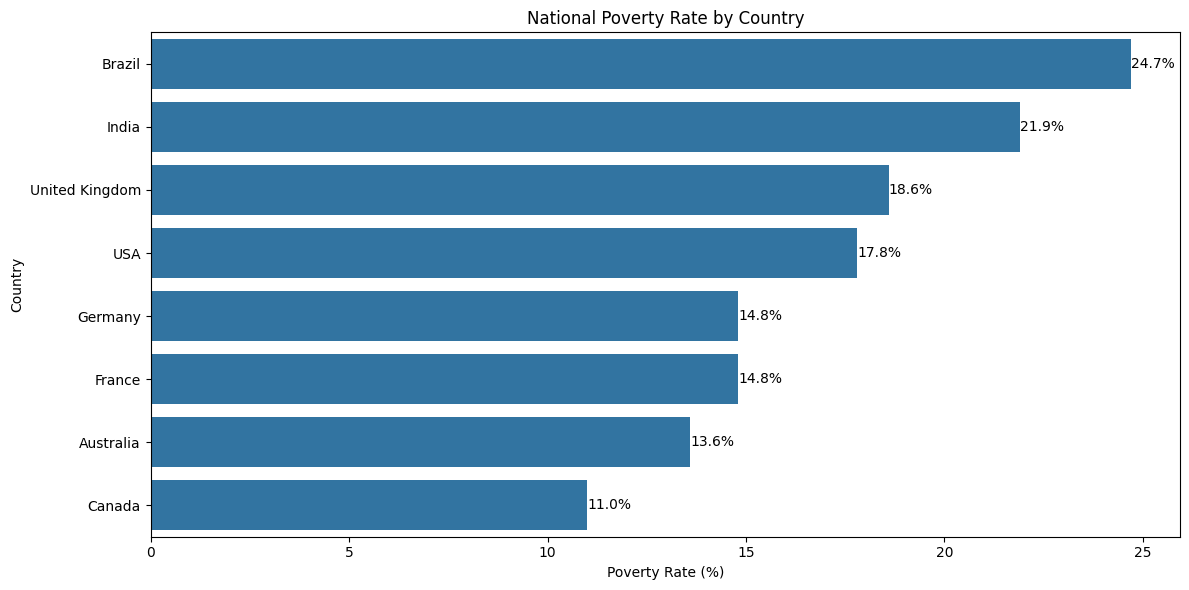

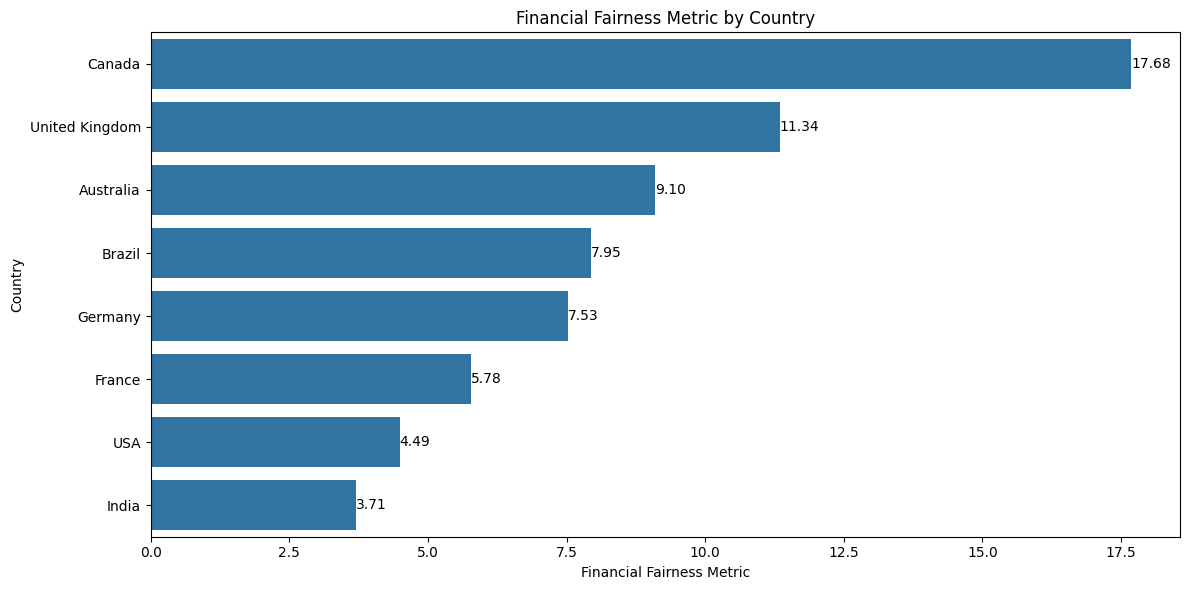

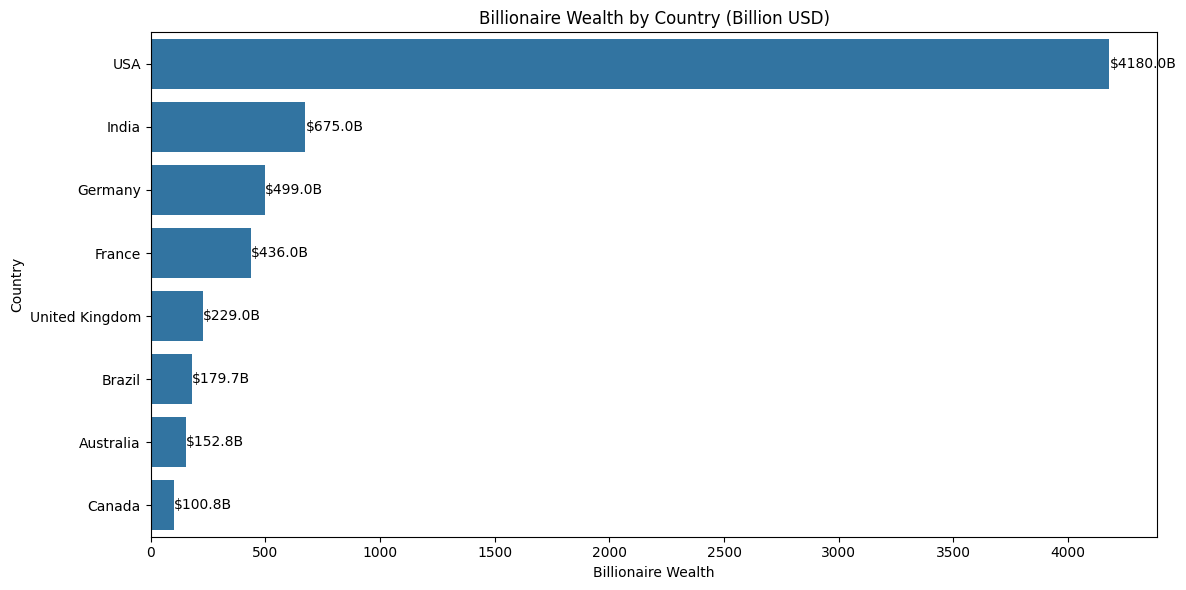

       Country  Population  Armed Forces  Incarcerated  Armed Forces %  Incarcerated %  GDP (billion USD)  Average Income (USD)  GDP per Capita  Poverty Rate (%)  Billionaire Wealth  Financial Fairness Metric
United Kingdom    67220000        194970         78058        0.290048        0.116123               2827                 42300    42055.935733              18.6               229.0                  11.344978
       Germany    83240000        183638         64666        0.220613        0.077686               4256                 53700    51129.264777              14.8               499.0                   7.529058
        Canada    38010000         67400         37854        0.177322        0.099590               1883                 48700    49539.594843              11.0               100.8                  17.680556
     Australia    25690000         59600         42970        0.231997        0.167264               1543                 53000    60062.281043              13.6   

In [12]:
new_data = {
    'Country': ['United Kingdom', 'Germany', 'Canada', 'Australia', 'India', 'Brazil', 'France', 'USA'],
    'Poverty Rate (%)': [18.6, 14.8, 11.0, 13.6, 21.9, 24.7, 14.8, 17.8],
    'Billionaire Wealth': [229.0, 499.0, 100.8, 152.8, 675.0, 179.7, 436.0, 4180.0]
}

# Create a new DataFrame with the new data
new_df = pd.DataFrame(new_data)

# Merge the new data with the existing DataFrame
df = pd.merge(df, new_df, on='Country')

# Calculate Financial Fairness Metric
# (Total GDP - Billionaire Wealth) / Billionaire Wealth
df['Financial Fairness Metric'] = (df['GDP (billion USD)'] - df['Billionaire Wealth']) / df['Billionaire Wealth']

# Function to create and display a bar plot with value labels
def create_labeled_bar_plot(df, column, title, fmt=''):
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=column, y='Country', data=df.sort_values(column, ascending=False))
    plt.title(title)
    if fmt:
        ax.bar_label(ax.containers[0], fmt=fmt)
    plt.tight_layout()
    plt.show()

# Create new visualizations
create_labeled_bar_plot(df, 'Poverty Rate (%)', 'National Poverty Rate by Country', '{:.1f}%')
create_labeled_bar_plot(df, 'Financial Fairness Metric', 'Financial Fairness Metric by Country', '{:.2f}')

# Also add a visualization for Billionaire Wealth
create_labeled_bar_plot(df, 'Billionaire Wealth', 'Billionaire Wealth by Country (Billion USD)', '${:.1f}B')

# Print the updated DataFrame
print(df.to_string(index=False))

In [13]:
new_data


{'Country': ['United Kingdom',
  'Germany',
  'Canada',
  'Australia',
  'India',
  'Brazil',
  'France',
  'USA'],
 'Poverty Rate (%)': [18.6, 14.8, 11.0, 13.6, 21.9, 24.7, 14.8, 17.8],
 'Billionaire Wealth': [229.0,
  499.0,
  100.8,
  152.8,
  675.0,
  179.7,
  436.0,
  4180.0]}